### DEMAPP09

# Linear Spline Approximation

In [1]:
from demos.setup import np, plt, demo
from compecon import BasisSpline
%matplotlib inline

In [2]:
def f(x):
    return 50 - np.cos(x**2 / 8) * (x - np.pi + .5)**2

In [3]:
xmin, xmax = 0.0, 1.5*np.pi
off = 0.05
xlims = [xmin - off, xmax + off]
n = 401
x = np.linspace(xmin, xmax, n)
y = f(x)
ymin, ymax = y.min(), y.max()
ywid = ymax - ymin
ylims = [ymin - 0.5*ywid, ymax + 0.1*ywid]

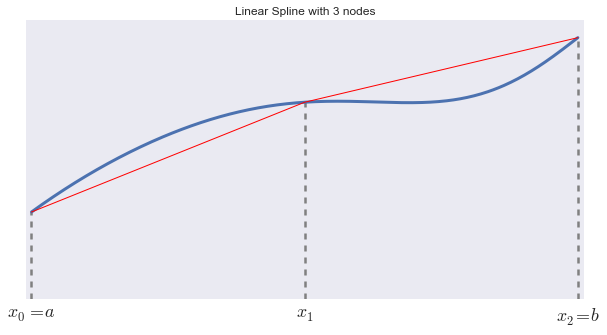

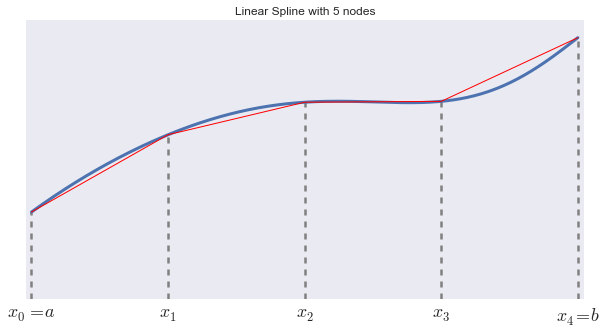

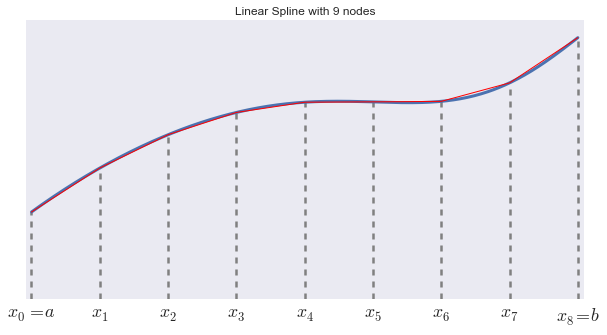

In [4]:
for nnode in 3, 5, 9:
    F = BasisSpline(nnode, xmin, xmax, k=1, f=f)
    xnodes = F.nodes[0]

    xx = np.r_[x, xnodes]
    xx.sort()

    demo.figure('Linear Spline with %d nodes' % nnode, '', '', 
                xlims, ylims, figsize=[10,5])
    plt.plot(xx, f(xx), lw=3)  # true function
    plt.plot(xx, F(xx), 'r', lw=1) # approximation
    plt.yticks(ylims, ['', ''])
    xe = ['$x_{%d}$' % k for k in range(nnode)]
    xe[0], xe[-1] = '$x_0=a$', '$x_{%d}=b$' % (nnode-1)
    plt.xticks(xnodes, xe, fontsize=18)
    for i, xi in enumerate(xnodes):
        plt.vlines(xi, ylims[0], F(xi), 'gray','--')
    plt.show()